In [75]:
import pandas as pd 
import numpy as np 


Zadanie 1. Wyczytywanie pliku csv, znajdowanie pustych wartości

Wczytaj plik nba.csv
Usuń wiersze, gdzie wszystkie wartości to NaN.
Policz, ile razy w każdej kolumnie występuje wartość NaN. Ile razy występuje w kolumnie College? Ile razy występuje w kolumnie Salary?
Wartości NaN w kolumnie College zastąpić przez wartość 'No College'
Zapisać plik jako nba1.csv


In [76]:
# wczytujemy plik nba.csv
df = pd.read_csv("nba.csv")
# usuwamy wszystkie wiersze zaweierające same NaN
df_ = df.copy().dropna(how='all')
#Policz, ile razy w każdej kolumnie występuje wartość NaN. Ile razy występuje w kolumnie College? Ile razy występuje w kolumnie Salary?
df_.isna().sum()


Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

Widzimy,ze w kolumnach college i salary mamy sporo brakujących danych w College- 84, a w Salary 11

In [77]:
# Wartości NaN w kolumnie College zastąpić przez wartość 'No College'
df_.fillna({'College':'No College'},inplace=True)

In [78]:
# i zapisujemy naszą wstępnie opracowaną ramkę 
df_.to_csv("nba1.csv")

Zadanie 2. Waga, wzrost, BMI

W kolumnie Weight waga zawodników podana jest w funtach. Utwórz kolumnę Weight_kg z przeliczoną masą na kilogramy
W kolumnie Height wzrost podany jest w stopach i calach, np. 6-10 to 6 stóp i 10 cali.
Zdefiniuj funkcję wzrost(height), która zamienia string height na dwie liczby całkowite: stopy i cale (np. dla height ='5-1', stopy = 5, cale =1), a następnie wzrost(height) zwraca wzrost w centymetrach.
Używając metody .apply() utwórz nową kolumnę Height_cm zawierającą wzrost w centymetrach.
Utwórz kolumnę BMI  zawierającą BMI zawodnika

In [79]:
# pracujemy juz na naszej wstepnie obrobionej ramce danych
#W kolumnie Weight waga zawodników podana jest w funtach. Utwórz kolumnę Weight_kg z przeliczoną masą na kilogramy
df_['Weight_kg'] = df['Weight'] * 0.453592


In [80]:
# W kolumnie Height wzrost podany jest w stopach i calach, np. 6-10 to 6 stóp i 10 cali.
# Zdefiniuj funkcję wzrost(height), która zamienia string height na dwie liczby całkowite: 
# stopy i cale (np. dla height ='5-1', stopy = 5, cale =1), a następnie wzrost(height) zwraca wzrost w centymetrach.

def wzrost(height):
    split = height.split("-")
    try:
        stopy = float(split[0])
        cale = float(split[1])
        centymetry = 30.48 * stopy + 2.54 * cale
        return round(centymetry,2)
    except ValueError:
        return np.NaN
    

In [81]:
# teraz zastosujemy funkcje do konwersji jednostek w naszej ramce danych 
# Używając metody .apply() utwórz nową kolumnę Height_cm zawierającą wzrost w centymetrach.
df_['Height_cm'] = df_['Height'].apply(wzrost)

In [82]:
# Utwórz kolumnę BMI  zawierającą BMI zawodnika
df_['BMI'] = df_['Weight_kg']/ ((df_['Height_cm']/100)**2)  # w bmi wzrost przeliczamy na metry 


Zadanie 3. Znajdowanie wartości min i max

Znajdź wiek najmłodszego gracza; sprawdź, czy jest tylko jeden taki gracz; podaj jego (ich) imię, nazwisko i klub.
Znajdź najwyższego zawodnika. Ilu zawodników jest tego wzrostu?
Który z dwóch zawodników zarabia więcej: najlżejszy czy najcięższy?
Ilu jest zawodników o największej liczbie lat? Który z nich zarabia najwięcej?


In [83]:
# Znajdź wiek najmłodszego gracza; sprawdź, czy jest tylko jeden taki gracz; podaj jego (ich) imię, nazwisko i klub.

min_wiek = df_['Age'].min() # patrzymy jaki jest najnizszy wiek zawodnika w naszym zbiorze
min_wiek

19.0

In [84]:
# popatrzymy ilu mamy takich zawodników, wybierzemy oczekiwane kolumny czyli imie nazwisko i zespol
df_[['Name','Team']][df_['Age']==min_wiek]

,Name,Team
122,Devin Booker,Phoenix Suns
226,Rashad Vaughn,Milwaukee Bucks


Widzimy, ze jest dwoch takich zawodnikow 

Znajdź najwyższego zawodnika. Ilu zawodników jest tego wzrostu?

In [85]:
max_wzrost = df_['Height_cm'].max()
df_[['Name','Team','Height_cm']][df_['Height_cm']==max_wzrost]

,Name,Team,Height_cm
40,Kristaps Porzingis,New York Knicks,220.98
302,Boban Marjanovic,San Antonio Spurs,220.98
322,Walter Tavares,Atlanta Hawks,220.98
455,Tibor Pleiss,Utah Jazz,220.98


Widzimy, ze jest czterech zawodnikow o najwiekszym wzroscie 

Który z dwóch zawodników zarabia więcej: najlżejszy czy najcięższy?

In [86]:
# najpierw wyswitlimy najlzejszego zawodniak aby miec tez pewnosc ze mamy doczynienia tylko z jednym zawodnikiem o najmniejszej wadze

piorko = df_[df_['Weight_kg']==df_['Weight_kg'].min()]
piorko

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Weight_kg,Height_cm,BMI
152,Aaron Brooks,Chicago Bulls,0.0,PG,31.0,6-0,161.0,Oregon,2250000.0,73.028312,182.88,21.835284


In [87]:
# odłozymy w pamieci zarobki najlzejszego zawodnika
piorko_pensja = piorko['Salary'].values[0]

In [88]:
# teraz to samo dla najciezszego 
ciezki = df_[df_['Weight_kg']==df_['Weight_kg'].max()]
ciezki

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Weight_kg,Height_cm,BMI
405,Nikola Pekovic,Minnesota Timberwolves,14.0,C,30.0,6-11,307.0,No College,12100000.0,139.252744,210.82,31.331425


In [89]:
# zapisujemy sobie pensje naszego najciezszego zawodniak
ciezki_pensja = ciezki['Salary'].values[0]


In [90]:
# teraz wyswietlimy zawodnika z tej pary ktory wiecej zarabia 
df_[df_['Salary'] == max([piorko_pensja,ciezki_pensja])]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Weight_kg,Height_cm,BMI
405,Nikola Pekovic,Minnesota Timberwolves,14.0,C,30.0,6-11,307.0,No College,12100000.0,139.252744,210.82,31.331425


In [91]:
# mozemy tez pozostac przy pracy na ramkach danych i polaczyc ta zawierajaca nalzszego i najciezszego zawodnika
# i nastepnie wybrac najwiecej zarabiajacego 
ciezki = df_[df_['Weight_kg']==df_['Weight_kg'].max()]
piorko = df_[df_['Weight_kg']==df_['Weight_kg'].min()]

# w tym przypadku nie musimy sie przejmowac czy ramki danych zawieraja tylko jeden taki przypadek 

In [92]:
lekkki_ciezki = pd.concat([ciezki,piorko]) # wpsujemy dwie ramki pod sobą

In [93]:
lekkki_ciezki[lekkki_ciezki['Salary']==lekkki_ciezki['Salary'].max()]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Weight_kg,Height_cm,BMI
405,Nikola Pekovic,Minnesota Timberwolves,14.0,C,30.0,6-11,307.0,No College,12100000.0,139.252744,210.82,31.331425


Ilu jest zawodników o największej liczbie lat? Który z nich zarabia najwięcej?


In [94]:
# zaczniemy od utworzenia ramki danych zawierajacych zawodnikow o najstarszym wieku 

df_old = df_[df_['Age']==df_['Age'].max()]
df_old

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Weight_kg,Height_cm,BMI
298,Tim Duncan,San Antonio Spurs,21.0,C,40.0,6-11,250.0,Wake Forest,5250000.0,113.39800,210.82,25.514190
304,Andre Miller,San Antonio Spurs,24.0,PG,40.0,6-3,200.0,Utah,250750.0,90.71840,190.50,24.998009
400,Kevin Garnett,Minnesota Timberwolves,21.0,PF,40.0,6-11,240.0,No College,8500000.0,108.86208,210.82,24.493622


In [95]:
# liczba takich zawodnikow
len(df_old)

3

In [96]:
# teraz pozostalo wybrac tego ktory najwiecej zarabia
df_old[df_old['Salary']==df_old['Salary'].max()]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Weight_kg,Height_cm,BMI
400,Kevin Garnett,Minnesota Timberwolves,21.0,PF,40.0,6-11,240.0,No College,8500000.0,108.86208,210.82,24.493622


In [97]:
# ewentualnie mozemy tez posortowac malejaco po kolumnie salary i wybrac pierwszy wiersz
df_old.sort_values(by = 'Salary' ,ascending= False).head(1)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Weight_kg,Height_cm,BMI
400,Kevin Garnett,Minnesota Timberwolves,21.0,PF,40.0,6-11,240.0,No College,8500000.0,108.86208,210.82,24.493622


Zadanie 4. Automatyzacja zapisu plików

Utwórz (np. ręcznie) katalog NBA teams.
Wczytaj plik nba1.csv
Z danych w kolumnie Team stwórz listę drużyn (bez powtórzeń)
Używając pętli for, dla każdej drużyny: (a) przefiltruj dane, by zawierały informacje tylko o danej drużynie; (b) zapisz je w plikach Nazwa Drużyny.csv, np. Miami Heat.csv  

In [98]:
nba_teams = pd.read_csv('nba1.csv')
# tworzymy liste temaow bez powtórzeń- idealnie nada się typ danych jakim jest zbior ktory domyslnie odrzuci duplikaty
lista_teamow = set(df_['Team'])


In [100]:
for i in lista_teamow:
    druzyna = df[df['Team']==i]  # odkladamy wycinek ramki danych dotyczacy danej druzyny w ramce danych 
    druzyna.to_csv(f'Nba_teams/{i}.csv') # zapisujemy nasz wycinek ramki danych

Zadanie 5. Tworzenie histogramów

Wczytaj plik nba1.csv
Dla każdej pozycji stwórz histogram wzrostu w cm dla wszystkich graczy o tej pozycji. 
Czy wzrost ma wpływ na to, na której pozycji gra gracz?

In [102]:
data = pd.read_csv('nba1.csv')
data['Height_cm'] = data['Height'].apply(wzrost)


In [103]:
data['Position'].unique()

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

In [124]:
data['Position'] = data['Position'].replace({'C':'Center(Srodkowy)','PF':'Power Forward(Silny skrzydlowy)',"PG":'Point guard(Rozgrywajacy)',"SF":'Small forward(Niski skrzydlowy)','SG':'Shooting guard(Rzucajacy obronca)'})


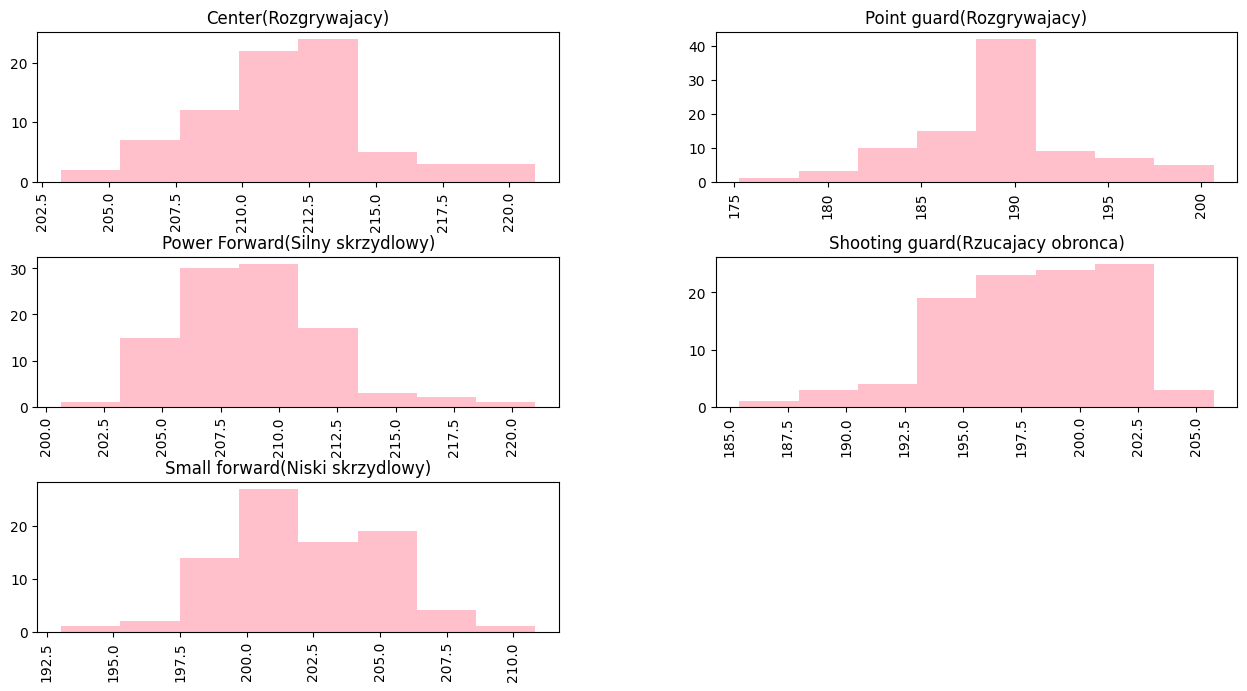

In [135]:
import matplotlib.pyplot as plt 
data.hist(by = 'Position',column='Height_cm',figsize=(15,8),color = 'pink',bins=8)
plt.show()

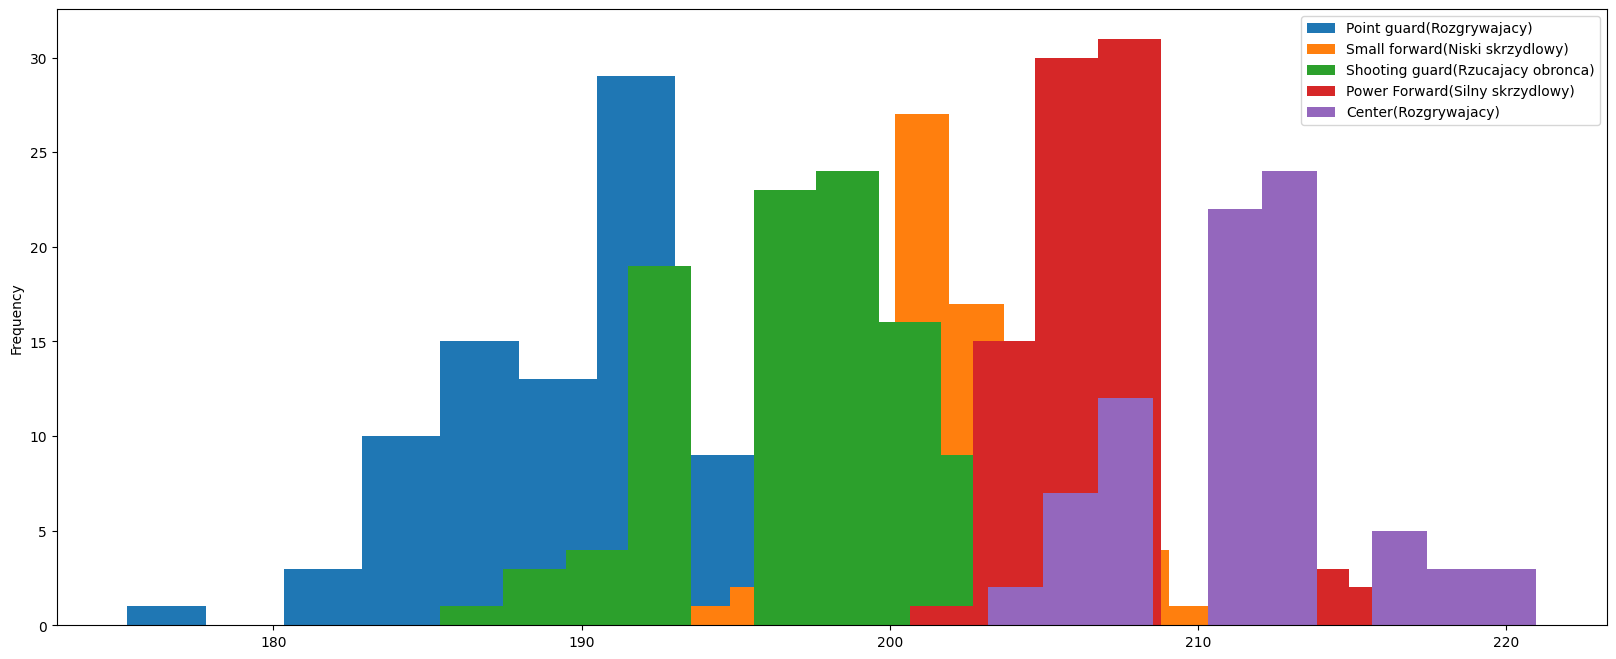

In [133]:
# dodatkowo narysujemy wszystkie histogramy na jednym wykresie 
pozycje = data['Position'].unique()
for i in pozycje:
    data[data['Position']==i]['Height_cm'].plot.hist(label = i,legend = True,figsize= (20,8))

Wydaje sie, ze zdecydowanie wzrost ma wplyw na to na jakiej pozycji gra zawodnik na przyklad na pozycji Center-srodkowy graja zawodnicy wsrod ktorych wzrost najczesciej jest pomiedzy 210-215 centrymetrow. A na pozycji Point guard- rozgrywajacy zawodnicy najczesciej pomiedzy 185, a 190 cm wiec roznice są wyrazne w zaleznosci od pozycji